In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
df=wine_quality.data.original

In [11]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,True
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,True
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,True
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True


In [3]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
df=pd.get_dummies(df,columns=["color"],drop_first=True)

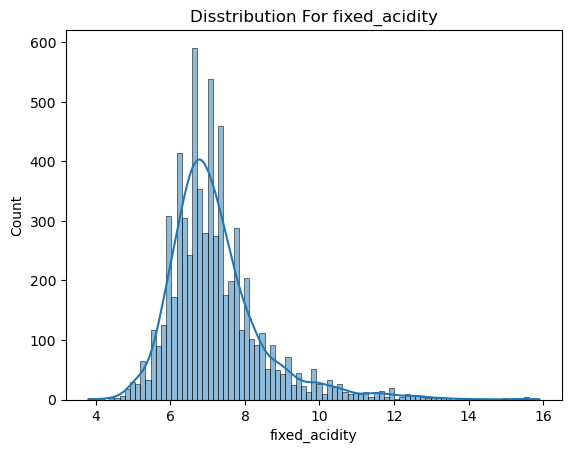

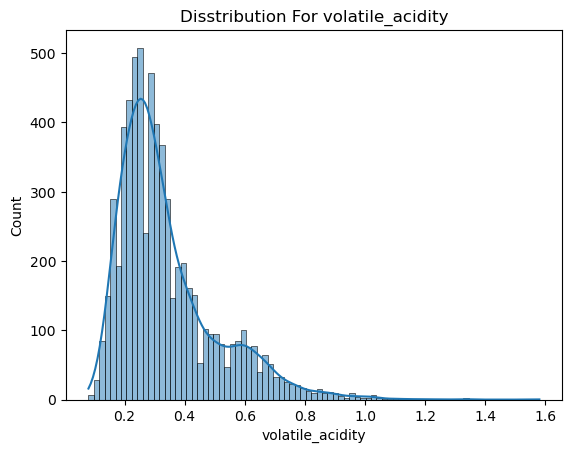

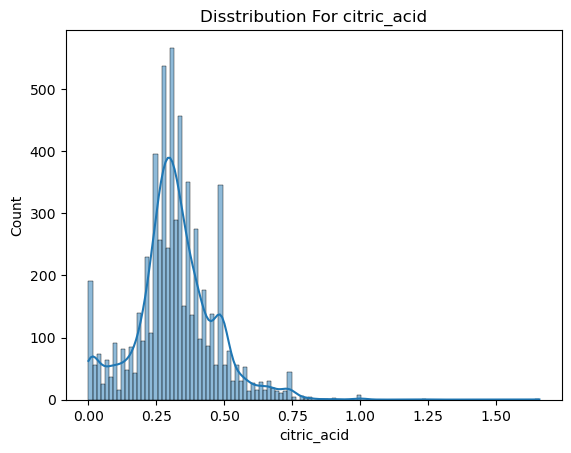

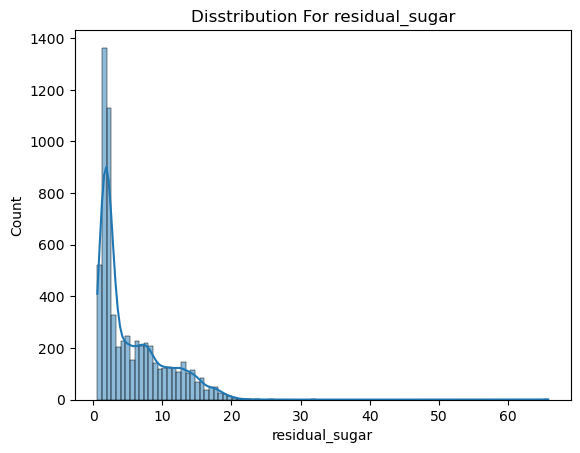

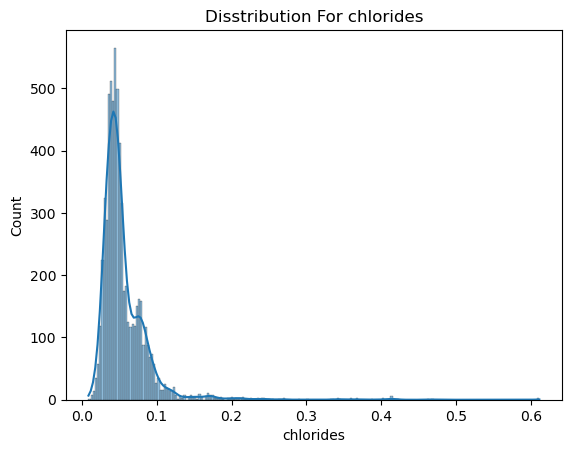

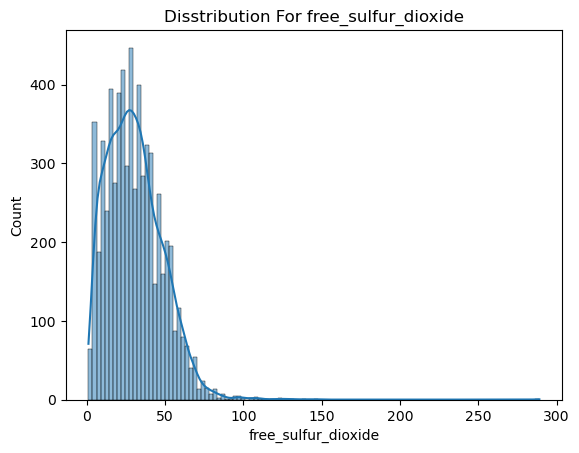

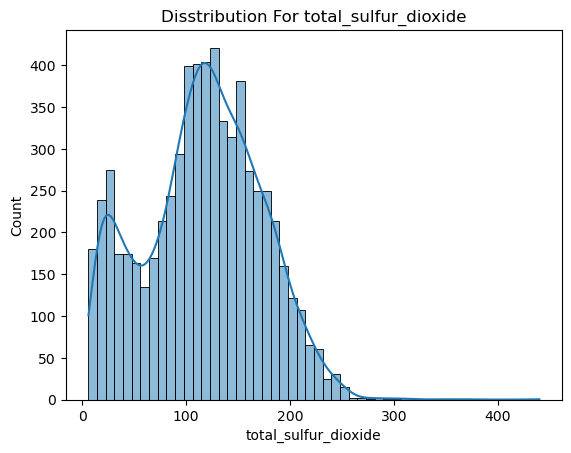

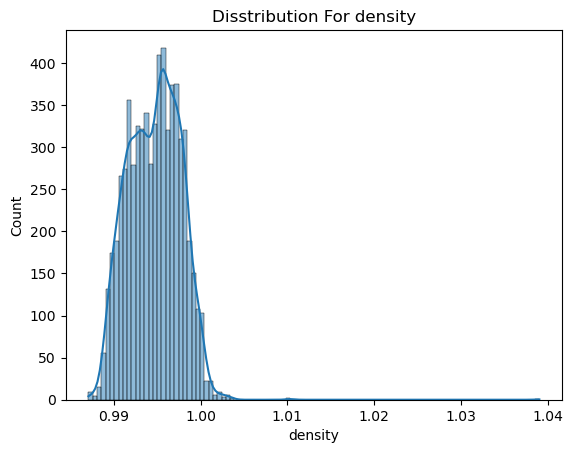

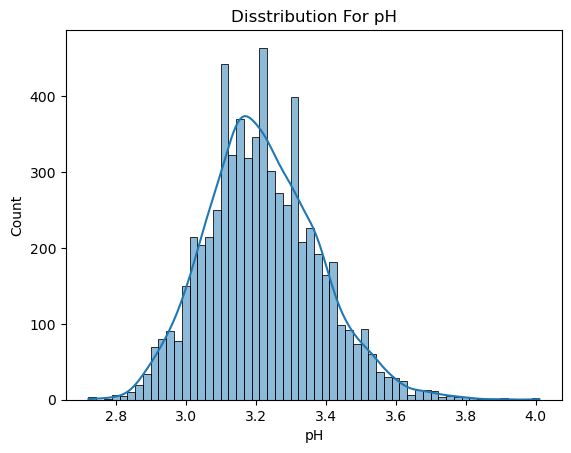

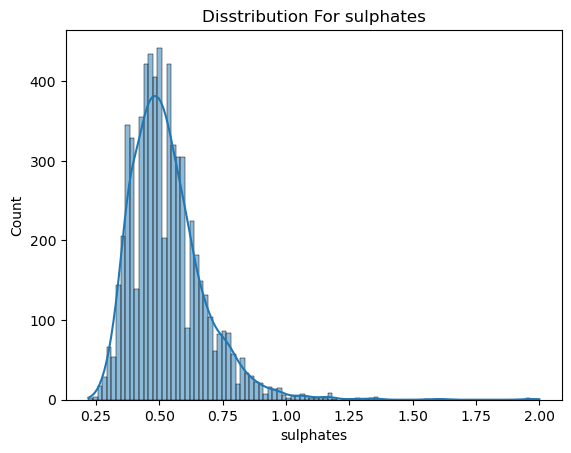

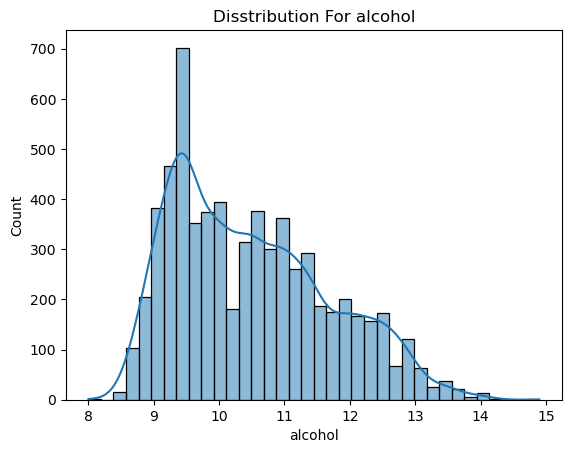

In [12]:
import seaborn as sns
for column in df.drop(["color_white","quality"],axis=1):
    sns.histplot(data=df[column],kde=True)
    plt.title(f'Disstribution For {column}')
    plt.show()

In [17]:
correlation_matrix=df.corr()
correlation_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_white
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


<Axes: >

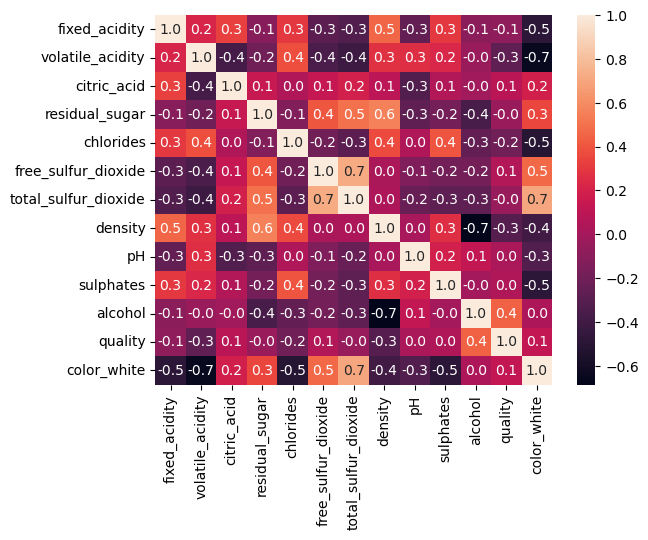

In [27]:
sns.heatmap(correlation_matrix,annot=True,fmt=".1f")

<Figure size 1200x600 with 0 Axes>

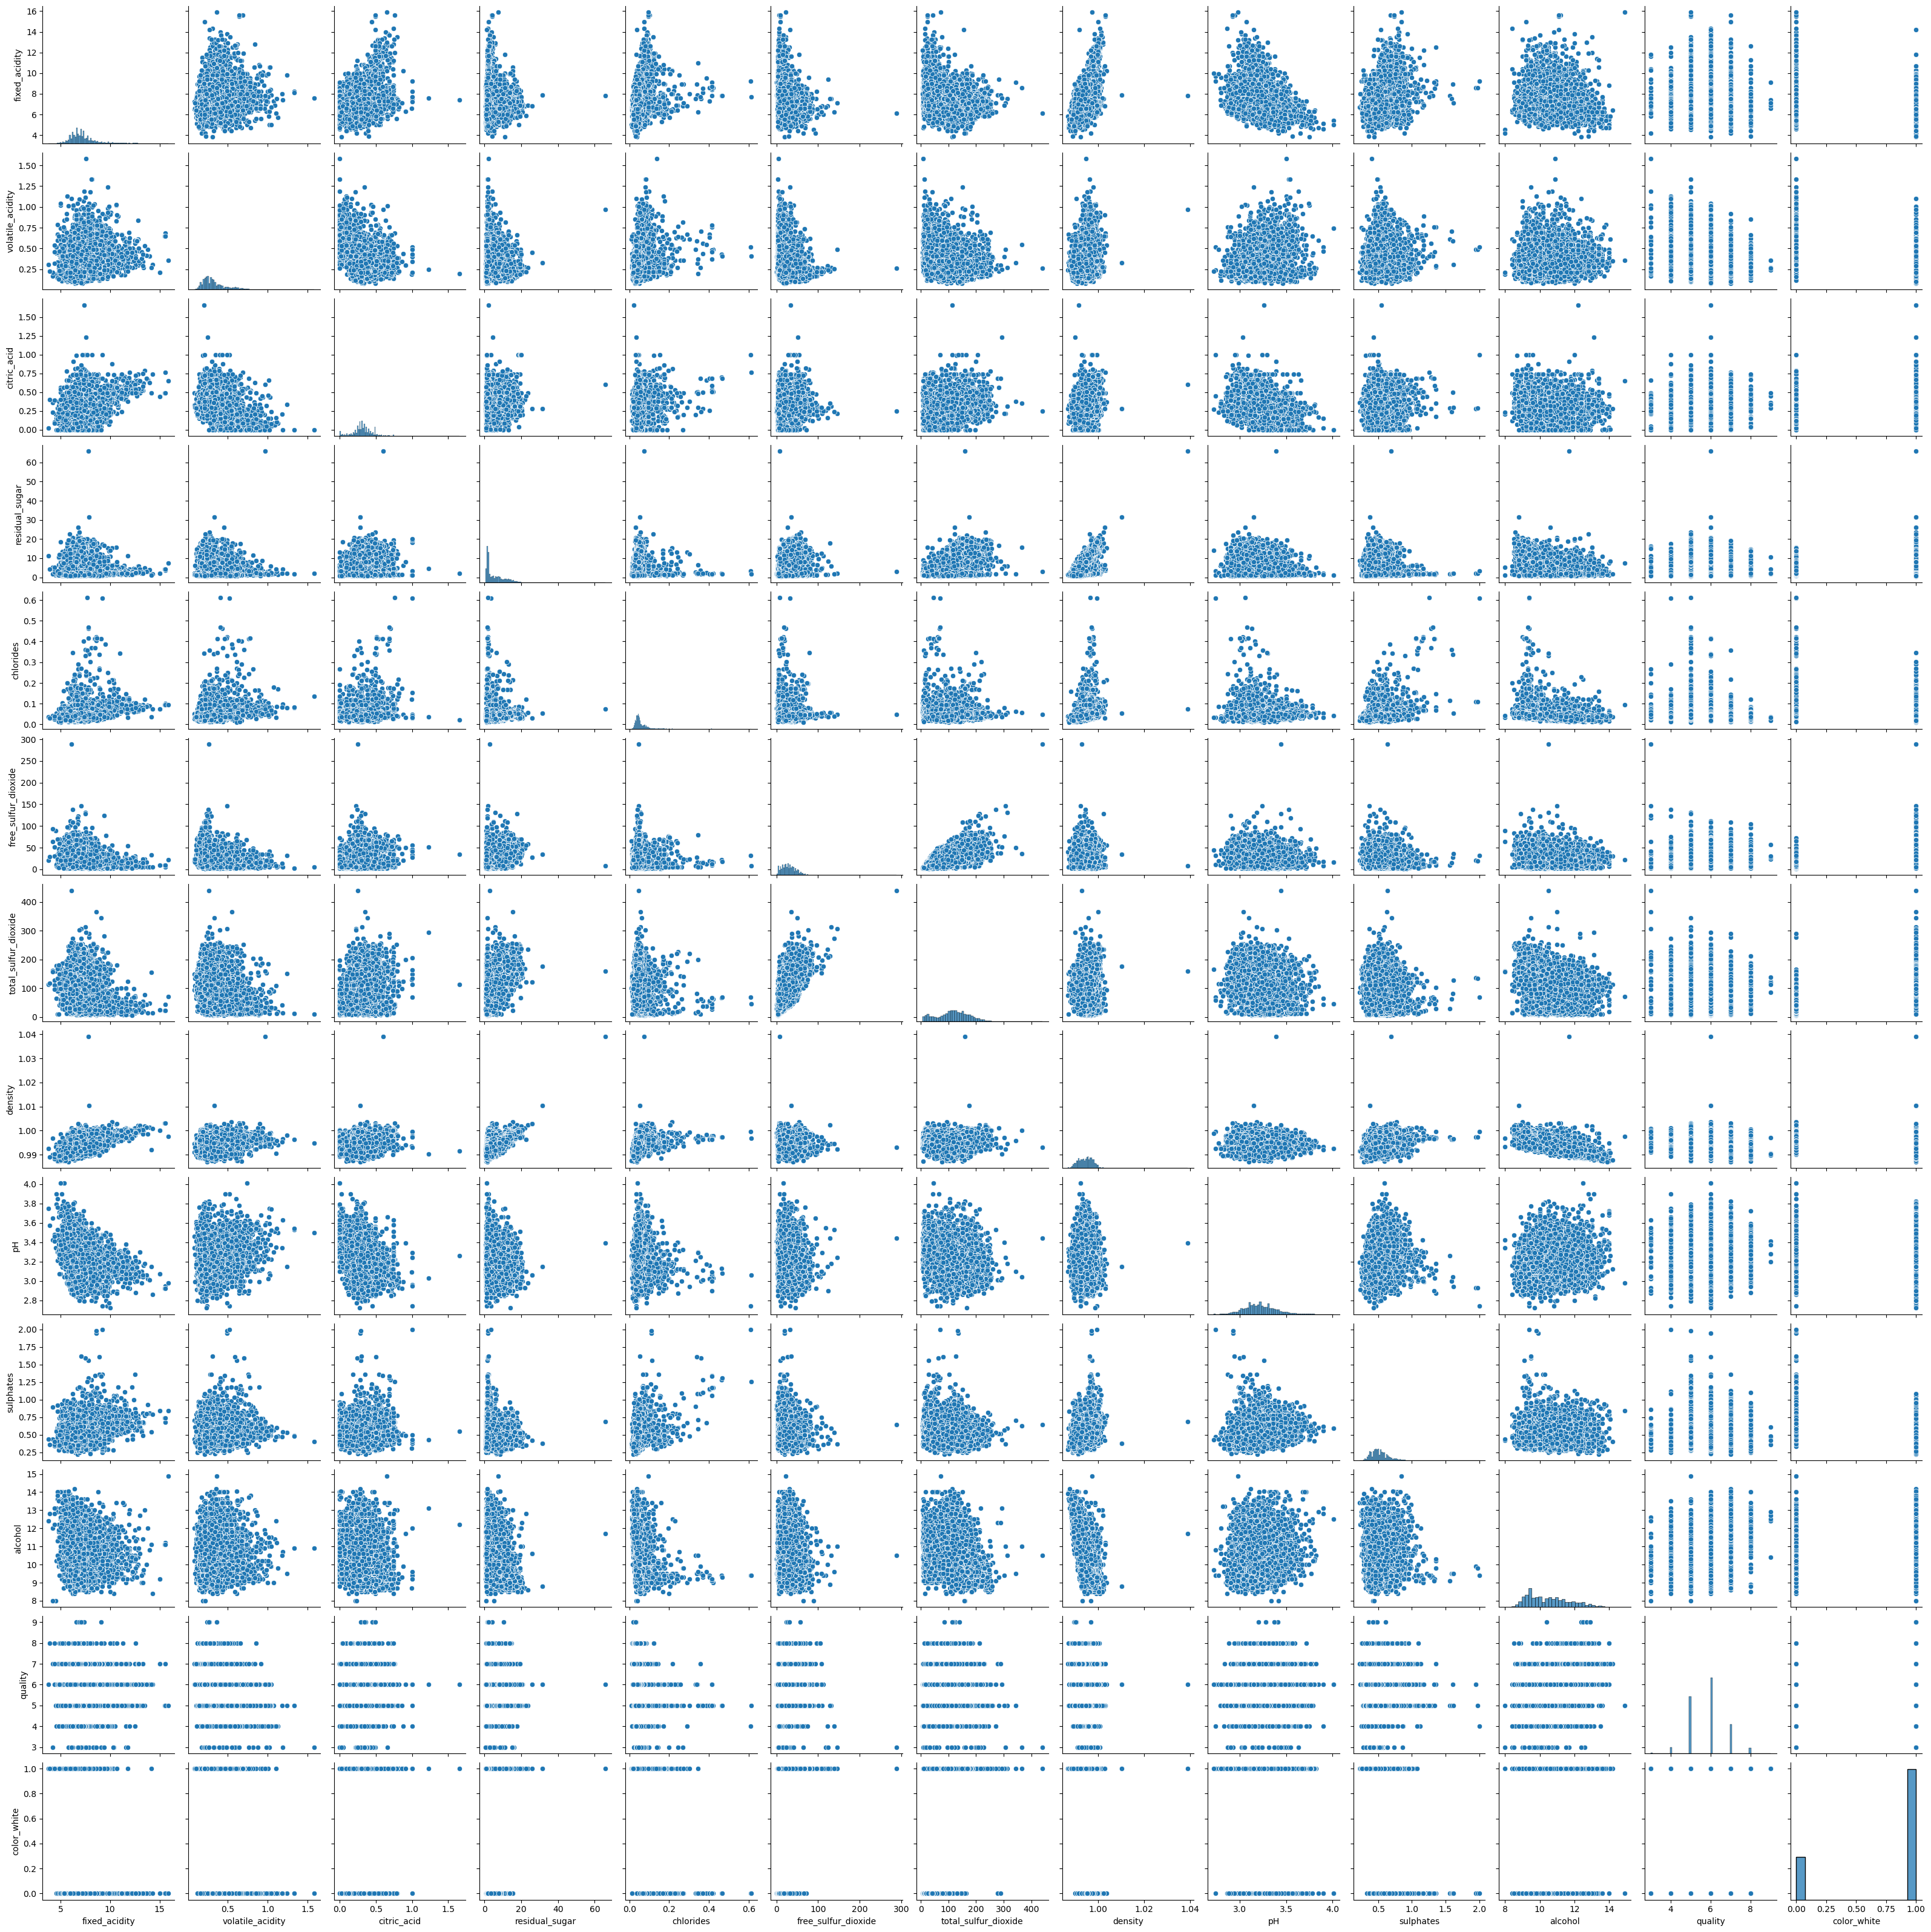

In [53]:
plt.figure(figsize=(12,6))
sns.pairplot(df)

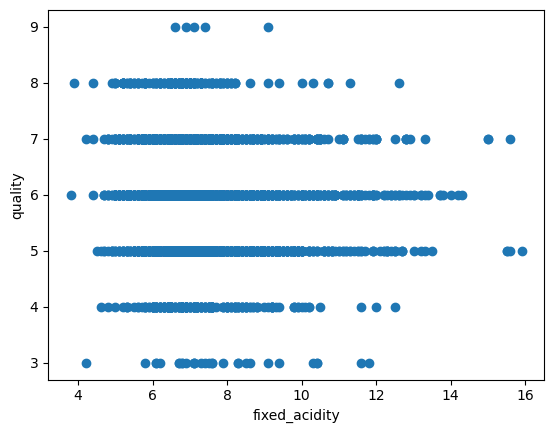

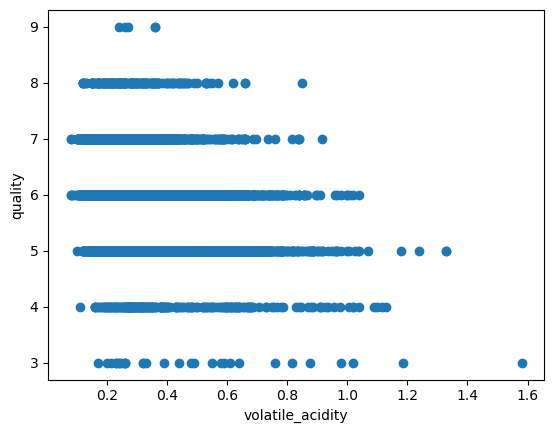

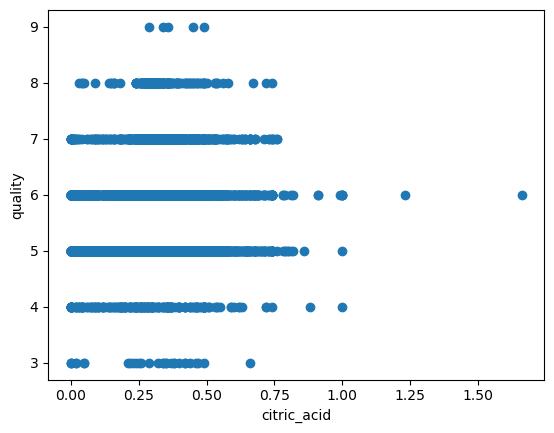

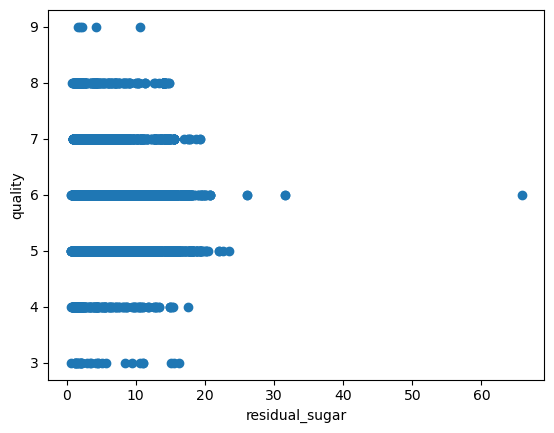

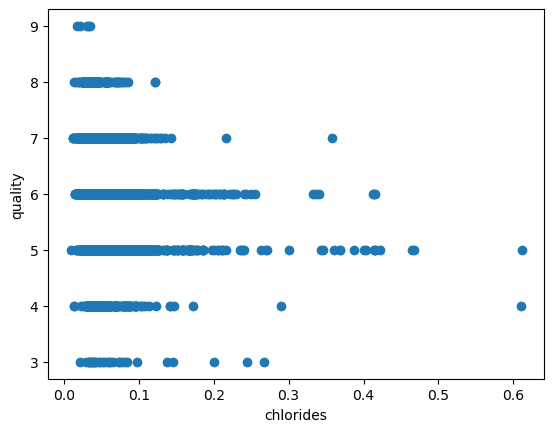

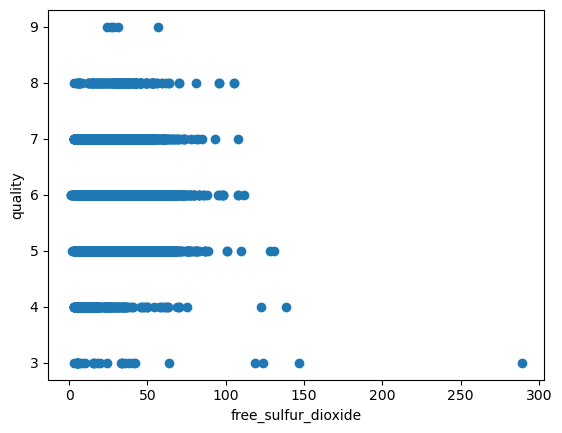

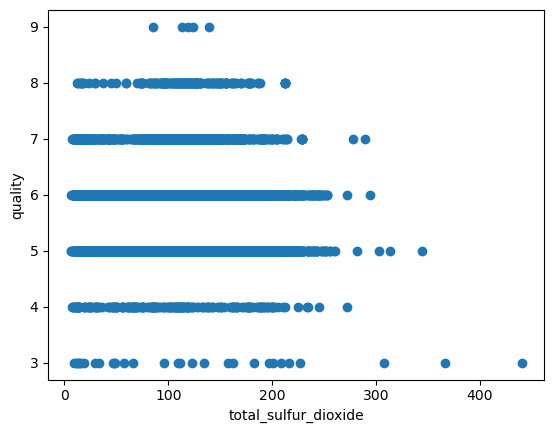

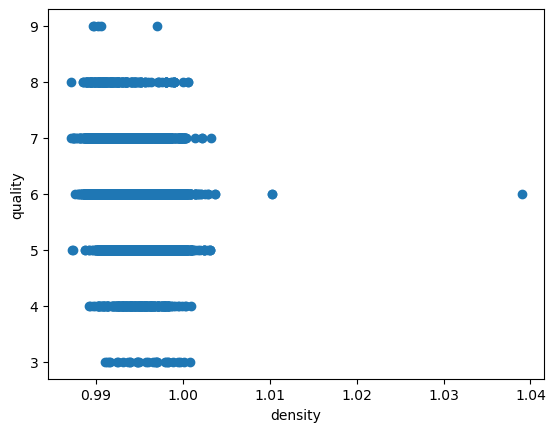

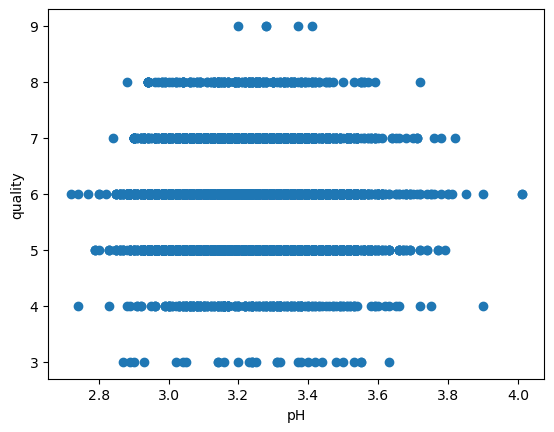

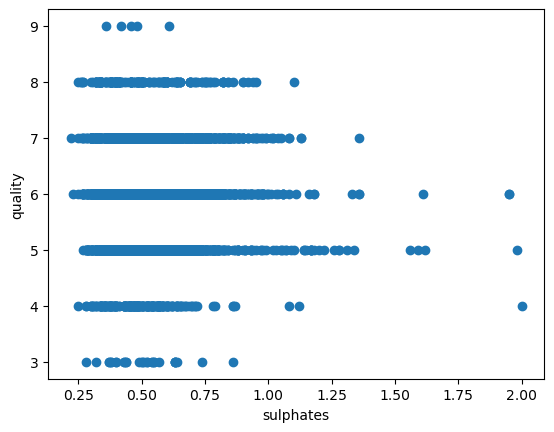

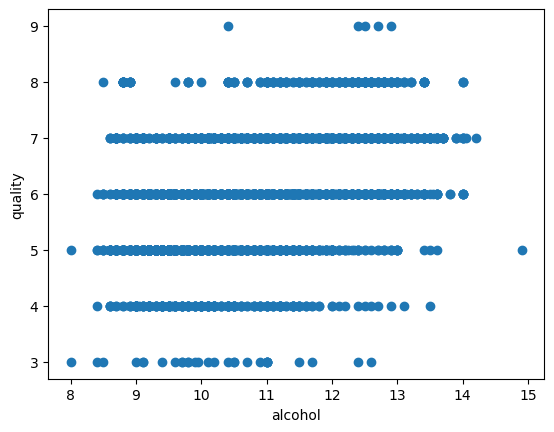

In [35]:
for col in columns:
    plt.scatter(df[col],df["quality"])
    plt.xlabel(col)
    plt.ylabel("quality")
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X=df.drop(["quality"],axis=1)
y=df.quality

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## TRAAINING WITH POLYNOMIAL REGRESSION

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pipe=Pipeline([
    ("scale",StandardScaler()),
    ("poly",PolynomialFeatures(degree=3)),
    ("model",XGBRegressor())
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [15]:
pipe.score(X_test,y_test)

0.45783908957979735

## FIXING THE CLASS IMBALANCE

In [49]:

df.quality.unique(),df.quality.value_counts()

(array([5, 6, 7, 4, 8, 3, 9], dtype=int64),
 quality
 6    2836
 5    2138
 7    1079
 4     216
 8     193
 3      30
 9       5
 Name: count, dtype: int64)

<BarContainer object of 7 artists>

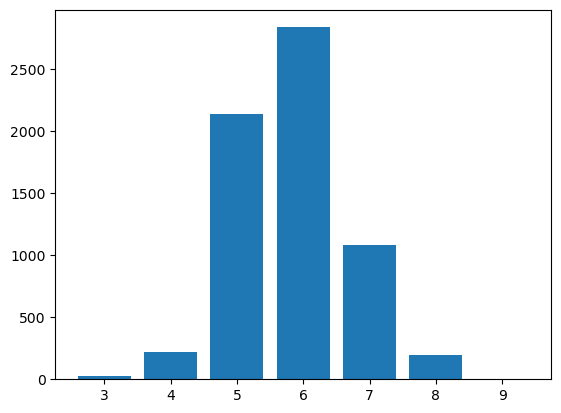

In [51]:
plt.bar(df.quality.unique(),[2138,2836,1079,216,193,30,5])

In [85]:
from imblearn.combine import SMOTETomek
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

smotetomek = SMOTETomek(smote=SMOTE(k_neighbors=3))  # Reducing the number of neighbors
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X, y)

X_train,X_test,y_train,y_test=train_test_split(X_smotetomek,y_smotetomek,test_size=0.3,random_state=42)

pipe=Pipeline([
    ("scale",StandardScaler()),
    ("model",DecisionTreeClassifier())
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [86]:
from sklearn.metrics import classification_report

y_pred=pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.95      0.98      0.97       884
           4       0.86      0.88      0.87       830
           5       0.70      0.67      0.68       758
           6       0.59      0.59      0.59       761
           7       0.76      0.73      0.75       869
           8       0.88      0.91      0.89       866
           9       1.00      0.99      1.00       829

    accuracy                           0.83      5797
   macro avg       0.82      0.82      0.82      5797
weighted avg       0.83      0.83      0.83      5797



In [81]:
pipe=Pipeline([
    ("scale",StandardScaler()),
    ("poly",PolynomialFeatures(degree=3)),
    ("model",LinearRegression())
])

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7839199633108711